## 딥러닝 영상처리
# 케라스와 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 유방암 데이터 분류

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [4]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

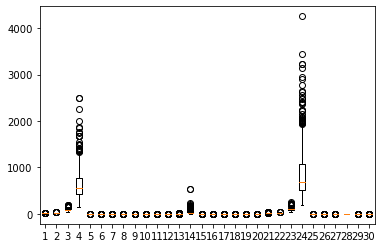

In [6]:
plt.boxplot(X); pass

In [60]:
### 정규화 적용
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
X_norm.shape

(569, 30)

In [66]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(30,), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [8]:
-np.log(0.7)

0.35667494393873245

In [67]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [68]:
model.fit(X_norm, y, epochs=100, validation_split=0.25)

Epoch 1/100
14/14 [==============================] - 0s 14ms/step - loss: 1.0213 - acc: 0.2324 - val_loss: 1.0868 - val_acc: 0.1189
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 0.9108 - acc: 0.2746 - val_loss: 0.9808 - val_acc: 0.1469
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.8296 - acc: 0.3122 - val_loss: 0.8996 - val_acc: 0.1748
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7661 - acc: 0.3568 - val_loss: 0.8356 - val_acc: 0.2028
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7151 - acc: 0.4061 - val_loss: 0.7835 - val_acc: 0.2657
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6737 - acc: 0.4437 - val_loss: 0.7415 - val_acc: 0.2867
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6408 - acc: 0.5258 - val_loss: 0.7059 - val_acc: 0.3986
Epoch 8/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6127 - 

In [69]:
h = model.history.history

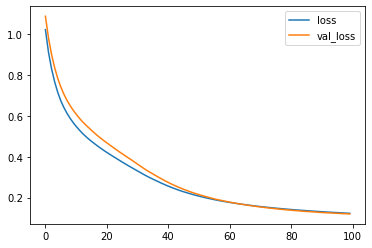

In [70]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

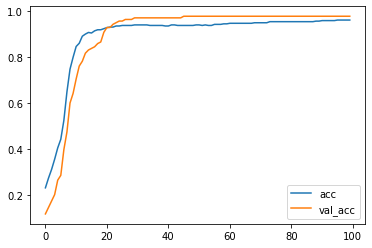

In [71]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

In [72]:
### 2개의 중간층
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(30,), activation='relu'))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 6         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [74]:
model.fit(X_norm, y, epochs=100, validation_split=0.25)

Epoch 1/100
14/14 [==============================] - 0s 15ms/step - loss: 0.7725 - acc: 0.3310 - val_loss: 0.7504 - val_acc: 0.4196
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 0.7402 - acc: 0.4178 - val_loss: 0.7241 - val_acc: 0.5385
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.7195 - acc: 0.4789 - val_loss: 0.7067 - val_acc: 0.6154
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7058 - acc: 0.5258 - val_loss: 0.6927 - val_acc: 0.6783
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6956 - acc: 0.5610 - val_loss: 0.6832 - val_acc: 0.7063
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6887 - acc: 0.5751 - val_loss: 0.6744 - val_acc: 0.7273
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6824 - acc: 0.5751 - val_loss: 0.6669 - val_acc: 0.7692
Epoch 8/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6769 - 

In [69]:
h = model.history.history

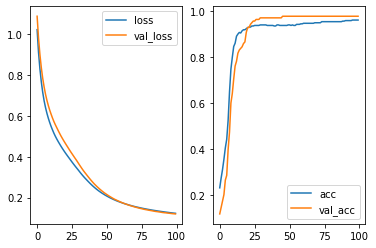

In [75]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

### 배치 설정

In [76]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return

In [82]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(30,), activation='relu'))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 6         
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [84]:
model.fit(X_norm, y, epochs=100, batch_size=16, validation_split=0.25)

Epoch 1/100
27/27 [==============================] - 1s 10ms/step - loss: 0.6925 - acc: 0.6479 - val_loss: 0.6833 - val_acc: 0.7762
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6792 - acc: 0.7019 - val_loss: 0.6675 - val_acc: 0.8042
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6643 - acc: 0.7254 - val_loss: 0.6495 - val_acc: 0.8042
Epoch 4/100
27/27 [==============================] - 0s 7ms/step - loss: 0.6471 - acc: 0.7465 - val_loss: 0.6289 - val_acc: 0.8112
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6271 - acc: 0.7512 - val_loss: 0.6033 - val_acc: 0.8182
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 0.6033 - acc: 0.7629 - val_loss: 0.5749 - val_acc: 0.8462
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 0.5759 - acc: 0.7958 - val_loss: 0.5437 - val_acc: 0.8531
Epoch 8/100
27/27 [==============================] - 0s 7ms/step - loss: 0.5469 - 

In [85]:
h = model.history.history

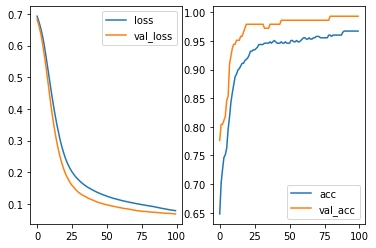

In [86]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])